In [ ]:
#Install Pandas (For CI Success) - Already installed Locally
%pip install pandas

In [ ]:
#Install Matplotlib (For CI Success) - Already installed Locally
%pip install matplotlib

In [ ]:
#Install SeaBorn (For CI Success) - Already installed Locally
%pip install seaborn

In [ ]:
#Install NLTK (For CI Success) - Already installed Locally
%pip install nltk

In [ ]:
#Install sklearn (For CI Success) - Already installed Locally
%pip install sklearn

In [ ]:
#Install seaborn (For CI Success) - Already installed Locally
%pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import re
import sklearn
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\windows\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Read googleplaystore_user_reviews.csv 
df = pd.read_csv('../googleplaystore_user_reviews.csv', encoding='latin1')

In [3]:
df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [4]:
#We are only interested in the Translated_Review and Sentiment Column
#df = pd.concat([df.Translated_Review,df.Sentiment], axis = 1)
df.dropna(axis = 0, inplace = True) #drop nan
df.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

Text(0.5, 1.0, 'Count of Sentiments')

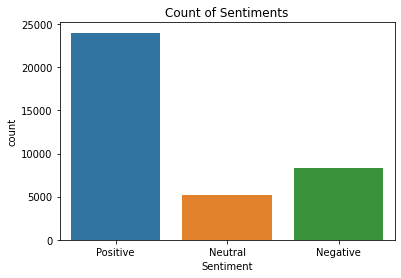

In [5]:
#Visualizing our Sentiment Data
sns.countplot(df.Sentiment)
plt.title('Count of Sentiments')

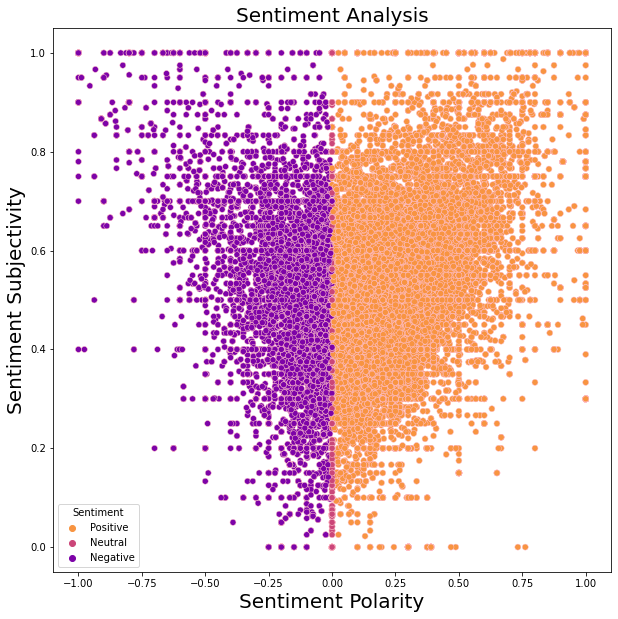

In [6]:
#Scatter Plotting
plt.figure(figsize=(10,10))
j = sns.scatterplot(df.Sentiment_Polarity,df.Sentiment_Subjectivity,hue=df.Sentiment, edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [7]:
#Import stopwords list to remove them from the Reviews
from nltk.corpus import stopwords 

#Now we Pre Process all the customer reviews
processed_list = []
for i in df.Translated_Review:
    text = re.sub("[^a-zA-Z]", " ", i)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    processed_list.append(text)

In [8]:
processed_list[:5]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way']

In [9]:
#Import CountVectorizer from Sklearn
from sklearn.feature_extraction.text import CountVectorizer
#Now we will create a bag of words using the CountVectorizer of sklearn

max_features=1000 #We consider the top 1000 features ordered by term frequency across the corpus
count_vectorizer=CountVectorizer(max_features=max_features)
sparce_matrix=count_vectorizer.fit_transform(processed_list).toarray()
bag_of_words=count_vectorizer.get_feature_names()

#print("Most used 50 words: ",bag_of_words[0:50])

In [10]:
#Classification Using Different Classification Algorithms
y = df.iloc[:,2].values
x = sparce_matrix

In [26]:
#Now first we have to split our data into two,
#training data set and testing data set for that
#we make use of train_test_split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42)

In [27]:
#First Classifier: NAIVE BAYES CLASSIFIER
#import guassian naive bayes classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(xtrain, ytrain)
print('Accuracy:', naive_bayes.score(xtest, ytest))

Accuracy: 0.5971146139460326


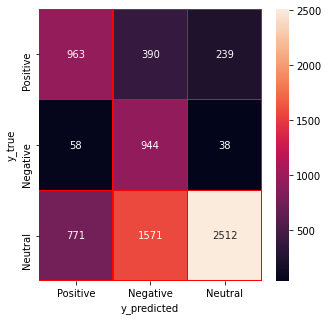

In [13]:
#confusion matrix for naive bayes classifier

from sklearn.metrics import confusion_matrix

y_predicted=naive_bayes.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [14]:
#Second Classifier: RANDOM FOREST CLASSIFIER
#import random forest classfier
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 10, random_state = 42)
random_forest.fit(xtrain, ytrain)
print("Accuracy: ", random_forest.score(xtest, ytest))

Accuracy:  0.8956719209190489


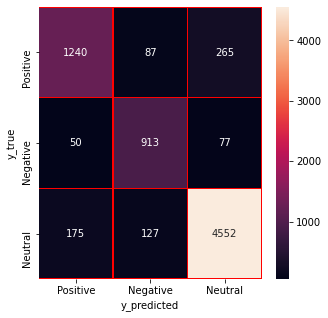

In [15]:
#confusion matrix for Random Forest Classifier

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted=random_forest.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [16]:
#Thir Classifier: Logisitic Regression
#import logistic regression

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(xtrain, ytrain)
print("Accuracy: ", logistic_regression.score(xtest, ytest))

Accuracy:  0.8980764092973551


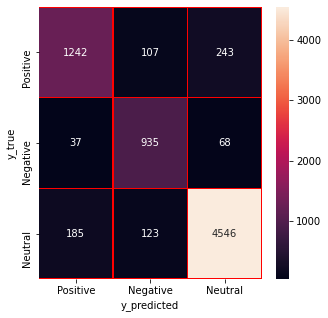

In [17]:
#confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix

y_predicted=logistic_regression.predict(xtest)
y_true = ytest
names=["Positive","Negative","Neutral"
cm=confusion_matrix(y_true,y_predicted)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [30]:
data_x = x
data_y = y

In [31]:
# using K Fold Cross Validation Technique
# import KFold from sklearn
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state = 42)

In [44]:
#using 10 fold cross validation technique to evaluate the model
#NAIVE BAYES CLASSIFIER
#scores_naive_bayes will contain scores of all 10 folds
scores_naive_bayes = []

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

for train_index, test_index in k_fold.split(data_x):
    xtrain, xtest, ytrain, ytest = data_x[train_index], data_x[test_index], data_y[train_index], data_y[test_index]
    naive_bayes.fit(xtrain, ytrain)
    scores_naive_bayes.append(naive_bayes.score(xtest, ytest))

print("Accuracy: ", np.mean(scores_naive_bayes))

Accuracy:  0.600235322575417


In [45]:
#RANDOM FOREST CLASSIFIER
#scores_naive_bayes will contain scores of all 10 folds
scores_random_forest = []
y_predict_random_forest = []
y_true_random_forest = []

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, random_state = 42)

for train, test in k_fold.split(data_x):
    xtrain, xtest, ytrain, ytest = data_x[train], data_x[test], data_y[train], data_y[test]
    random_forest.fit(xtrain, ytrain)
    scores_random_forest.append(random_forest.score(xtest, ytest))

print("Accuracy: ", np.mean(scores_random_forest))

Accuracy:  0.8938739736230238


In [46]:
#LOGISTIC REGRESSION
#scores_logistic_regression will contain scores of all 10 folds
scores_logistic_regression = []

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

for train, test in k_fold.split(data_x):
    xtrain, xtest, ytrain, ytest = data_x[train], data_x[test], data_y[train], data_y[test]
    logistic_regression.fit(xtrain, ytrain)
    scores_logistic_regression.append(logistic_regression.score(xtest, ytest))

print("Accuracy: ", np.mean(scores_logistic_regression))

Accuracy:  0.8979616467039918
